<a href="https://colab.research.google.com/github/Pradeepjha011/data-failure/blob/code/data_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/StockX-Data-Contest-2019-3.csv')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Statistical summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.dropna(subset=['Sale Price', 'Retail Price'])

In [ ]:
# Remove $ and commas, then convert to numeric
df['Sale Price'] = df['Sale Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Retail Price'] = df['Retail Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-525296302.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Sale Price'] = df['Sale Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/tmp/ipython-input-525296302.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Retail Price'] = df['Retail Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [ ]:
df[['Sale Price', 'Retail Price']].head()
df.dtypes  # Ensure both are float now

,0
Order Date,object
Brand,object
Sneaker Name,object
Sale Price,float64
Retail Price,float64
Release Date,object
Shoe Size,float64
Buyer Region,object


In [ ]:
# Target column: Price_Up (1 if Sale Price > Retail Price, else 0)
df['Price_Up'] = (df['Sale Price'] > df['Retail Price']).astype(int)

# Profit margin
df['Profit_Margin'] = df['Sale Price'] - df['Retail Price']


In [ ]:
df.isnull().sum()


,0
Order Date,0
Brand,0
Sneaker Name,0
Sale Price,0
Retail Price,0
Release Date,0
Shoe Size,0
Buyer Region,0
Price_Up,0
Profit_Margin,0


In [ ]:
from datetime import datetime

# Convert release date to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Create Years_Since_Release feature
df['Years_Since_Release'] = (datetime.now() - df['Release Date']).dt.days / 365

# Create target: Price_Up (1 = Sale Price > Retail Price, else 0)
df['Price_Up'] = (df['Sale Price'] > df['Retail Price']).astype(int)

# Profit margin
df['Profit_Margin'] = df['Sale Price'] - df['Retail Price']

/tmp/ipython-input-354137084.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


In [ ]:
df = pd.get_dummies(df, columns=['Brand', 'Sneaker Name', 'Buyer Region'], drop_first=True)

In [ ]:
# Select only numerical and one-hot encoded columns for features
X = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
y = df['Price_Up']

# Drop columns that cause data leakage
X = X.drop(['Sale Price', 'Retail Price', 'Profit_Margin', 'Price_Up'], axis=1, errors='ignore')

# Drop the original 'Release Date' column
X = X.drop('Release Date', axis=1, errors='ignore')

Please re-run the data splitting cell below (with `train_test_split`) to ensure the training and testing sets are updated with the corrected features.

After re-running the data splitting cell, please re-run the model training and evaluation cell below to see the performance with the corrected features.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9909905271828665

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       175
           1       0.99      1.00      1.00     19249

    accuracy                           0.99     19424
   macro avg       0.75      0.50      0.50     19424
weighted avg       0.99      0.99      0.99     19424

Confusion Matrix:
 [[    1   174]
 [    1 19248]]


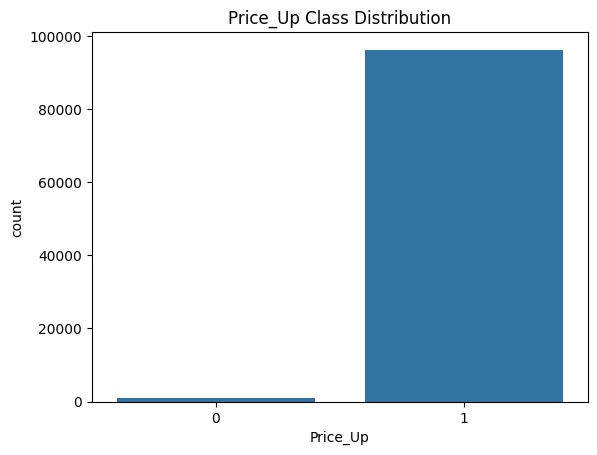

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Price_Up'])
plt.title('Price_Up Class Distribution')
plt.show()

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9061985172981878

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.71      0.12       175
           1       1.00      0.91      0.95     19249

    accuracy                           0.91     19424
   macro avg       0.53      0.81      0.54     19424
weighted avg       0.99      0.91      0.94     19424

Confusion Matrix:
 [[  125    50]
 [ 1772 17477]]


To test the model on new data, we first need to load the new data and apply the same preprocessing steps as we did for the training data.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

**Reasoning**:
Train the RandomForestClassifier model using the resampled training data.



In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9344110378912686

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.58      0.14       175
           1       1.00      0.94      0.97     19249

    accuracy                           0.93     19424
   macro avg       0.54      0.76      0.55     19424
weighted avg       0.99      0.93      0.96     19424

Confusion Matrix:
 [[  101    74]
 [ 1200 18049]]


## Summary:

### Data Analysis Key Findings

* The `imbalanced-learn` library was already installed, allowing for the application of SMOTE.
* SMOTE was successfully applied to the training data, resulting in balanced `X_resampled` and `y_resampled` datasets.
* A `RandomForestClassifier` was retrained on the balanced training data.
* Evaluation on the original test set showed an overall accuracy of approximately 0.934.
* The classification report indicated poor performance on the minority class (class 0), with a precision of 0.08, recall of 0.58, and an F1-score of 0.14.
* The majority class (class 1) still performed well, with a precision of 1.00, recall of 0.94, and an F1-score of 0.97.
* The confusion matrix revealed 101 true negatives, 74 false positives, 1200 false negatives, and 18049 true positives, highlighting the model's difficulty in correctly identifying the minority class (1200 false negatives for class 0).

### Insights or Next Steps

* Despite using SMOTE, the retrained model still struggles to predict the minority class accurately, as evidenced by the low precision and F1-score for class 0.
* Further techniques for handling imbalanced data, such as exploring different sampling methods (e.g., undersampling the majority class), using different algorithms, or adjusting model hyperparameters, could be explored to improve minority class prediction.